# Iris species classification

In [1]:
%matplotlib inline

In [3]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target).map(lambda x: iris.target_names[x])

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object

In [6]:
from sklearn import model_selection
from sklearn import neighbors


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True, random_state=42)

knn = neighbors.KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

y_pred = knn.predict_proba(X_test)
y_pred = pd.DataFrame(y_pred, columns=knn.classes_)

In [7]:
import ethik

explainer = ethik.Explainer()
explainer = explainer.fit(X_test)

## Prediction plots

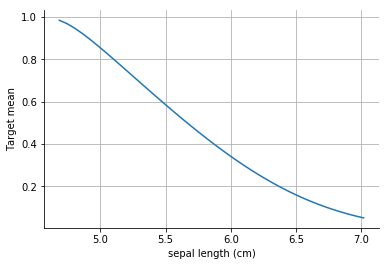

In [18]:
ax = explainer.plot_predictions(
    X=X_test['sepal length (cm)'],
    y_pred=y_pred['setosa']
)

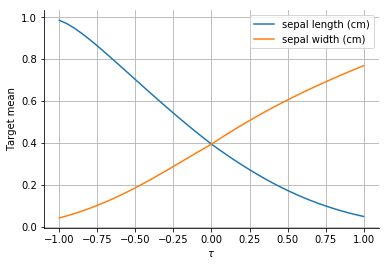

In [19]:
ax = explainer.plot_predictions(
    X=X_test[['sepal length (cm)', 'sepal width (cm)']],
    y_pred=y_pred['setosa']
)

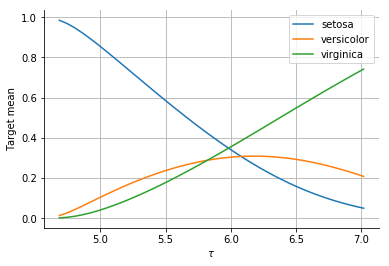

In [21]:
ax = explainer.plot_predictions(
    X=X_test['sepal length (cm)'],
    y_pred=y_pred
)

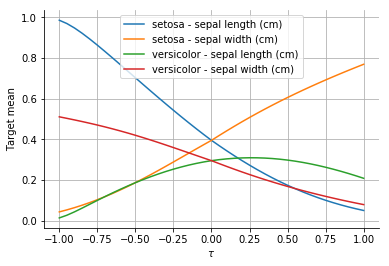

In [22]:
ax = explainer.plot_predictions(
    X=X_test[['sepal length (cm)', 'sepal width (cm)']],
    y_pred=y_pred[['setosa', 'versicolor']]
)